In [50]:
import pandas as pd 
from pathlib import Path
import sys
import csv
import ast

# Import scientific librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from pathlib import Path
# Add project directory to kernel paths
sys.path.append('../../')


print("We're running localy")

We're running localy


In [51]:

# Example data
data = [
    {
        "domaine": "Marseille",
        "id": 1,
        "year": 2000,
        "parameters": {
            "humidity": "20",
            "sickness": True,
            "temperature": "20"
        }
    },
    {
        "domaine": "Marseille",
        "id": 2,
        "year": 2001,
        "parameters": {
            "humidity": "30",
            "sickness": False,
            "temperature": "25"
        }
    },
    {
        "domaine": "Marseille",
        "id": 3,
        "year": 2002,
        "parameters": {
            "humidity": "23",
            "sickness": False,
            "temperature": "25"
        }
    },
    {
        "domaine": "Marseille",
        "id": 4,
        "year": 2003,
        "parameters": {
            "humidity": "15",
            "sickness": True,
            "temperature": "20"
        }
    },
    {
    "domaine": "Marseille",
    "id": 5,
    "year": 2004,
    "parameters": {
        "humidity": "21",
        "sickness": True,
        "temperature": "20"
    }
},
    {
    "domaine": "Marseille",
    "id": 6,
    "year": 2005,
    "parameters": {
        "humidity": "15",
        "sickness": False,
        "temperature": "30"
    }
},
     {
    "domaine": "Marseille",
    "id": 7,
    "year": 2006,
    "parameters": {
        "humidity": "28",
        "sickness": True,
        "temperature": "20"
    }
},
     {
    "domaine": "Marseille",
    "id": 8,
    "year": 2007,
    "parameters": {
        "humidity": "22",
        "sickness": True,
        "temperature": "18"
    }
},
]

# CSV file path
csv_file = "data.csv"

# CSV header
fields = ["Years", "AverageHumidity", "Domaine"]

# Prepare rows for CSV
rows = []
for entry in data:
    year = f"{entry['year']}-01-01"
    humidity = entry['parameters']['humidity']
    domaine = entry['domaine']
    rows.append([year, humidity, domaine])

# Write data to CSV
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(fields)
    writer.writerows(rows)

print("CSV file created successfully!")

CSV file created successfully!


In [52]:
# Create a DataFrame from the 'data' variable
df_vigne = pd.DataFrame(data)
df_vigne

,domaine,id,year,parameters
0,Marseille,1,2000,"{'humidity': '20', 'sickness': True, 'temperat..."
1,Marseille,2,2001,"{'humidity': '30', 'sickness': False, 'tempera..."
2,Marseille,3,2002,"{'humidity': '23', 'sickness': False, 'tempera..."
3,Marseille,4,2003,"{'humidity': '15', 'sickness': True, 'temperat..."
4,Marseille,5,2004,"{'humidity': '21', 'sickness': True, 'temperat..."
5,Marseille,6,2005,"{'humidity': '15', 'sickness': False, 'tempera..."
6,Marseille,7,2006,"{'humidity': '28', 'sickness': True, 'temperat..."
7,Marseille,8,2007,"{'humidity': '22', 'sickness': True, 'temperat..."


<Axes: xlabel='year'>

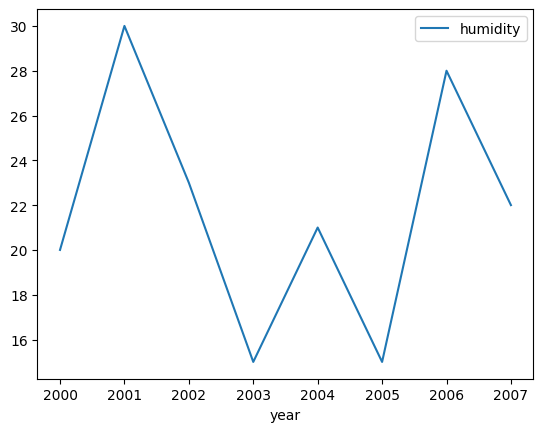

In [53]:
# Convert the "humidity" values to numeric
df_vigne['humidity'] = pd.to_numeric(df_vigne['parameters'].apply(lambda x: x['humidity']), errors='coerce')

# Plot the humidity values
df_vigne.plot(x='year', y='humidity', kind='line')

<Axes: >

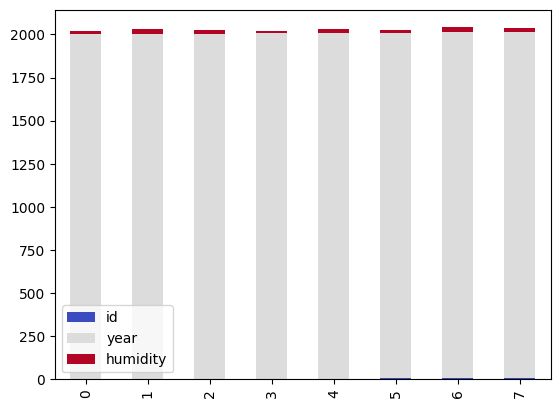

In [54]:
df_vigne.plot(kind='bar', stacked=True, colormap='coolwarm')

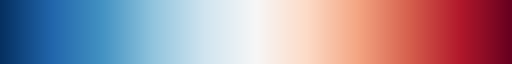

In [56]:
plt.get_cmap('RdBu_r')

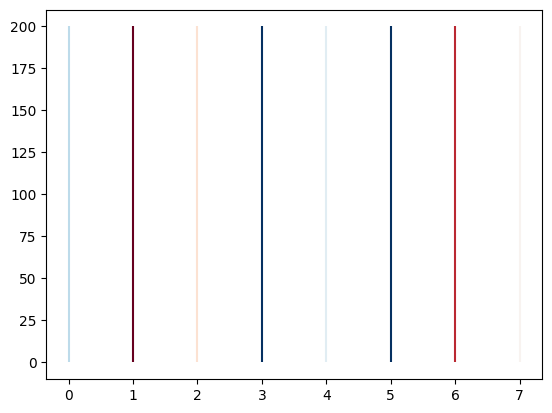

In [61]:
from numpy import interp

cmap = plt.get_cmap('RdBu_r')

min = df_vigne.humidity.min()
max = df_vigne.humidity.max()
mean = df_vigne.humidity.mean()

def getColor(temperature) : 
    return interp(temperature,[min,mean,max],[0,0.5,1])

cpt = 0

for index, row in df_vigne.iterrows():
    plt.vlines(cpt, 0, 200, color=cmap(getColor(row["humidity"])))
    cpt+=1

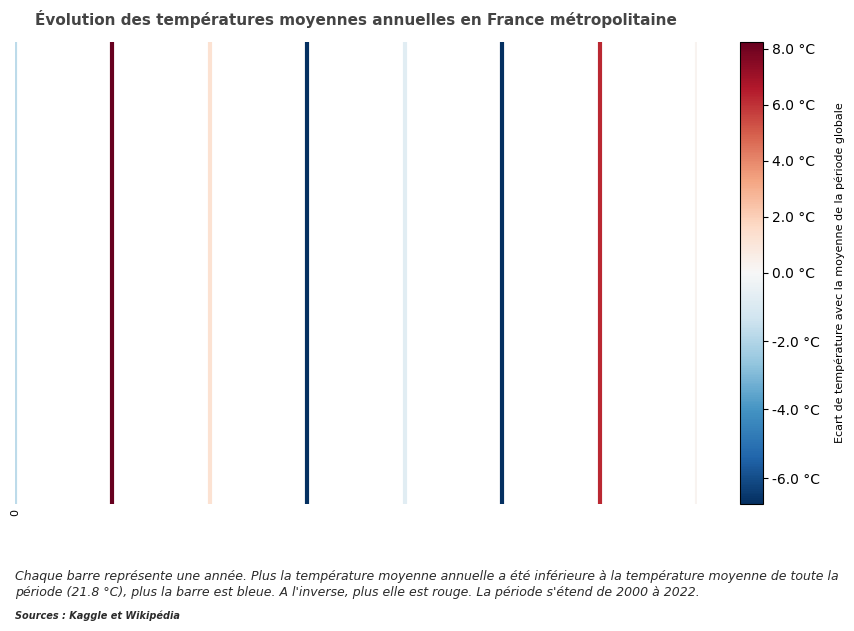

In [62]:
import matplotlib as mpl

#Améliorations :
cpt = 0
height = 600
width = 1100

px = 1/plt.rcParams['figure.dpi']
fig,ax = plt.subplots(figsize=(width*px,height*px))

labels_years = []

for index, row in df_vigne.iterrows():
    plt.vlines(cpt, 0, height, linewidth=3, color=cmap(getColor(row["humidity"])))
    cpt+=1
    if (int(row.name)) % 10 ==0:
        labels_years.append(str(row.name))
    else :
        labels_years.append("")

plt.yticks(visible = False)
plt.xticks(range(0,len(labels_years)),labels_years, rotation='vertical', fontsize=8)
plt.box(False)
plt.margins(x=0, y=0)
plt.tick_params(axis='both', length = 0)
plt.title("Évolution des températures moyennes annuelles en France métropolitaine", color="#444444", pad=12, fontsize=11, fontweight="bold")
plt.text(0, -120, "Chaque barre représente une année. Plus la température moyenne annuelle a été inférieure à la température moyenne de toute la\npériode ("+str(round(mean,1))+" °C), plus la barre est bleue. A l'inverse, plus elle est rouge. La période s'étend de 2000 à 2022.", fontsize=9,fontstyle="italic",linespacing=1.3, color="#2b2b2b")
plt.text(0, -150, "Sources : Kaggle et Wikipédia", fontsize=7,fontstyle="italic",color="#2b2b2b", fontweight="bold")

#colorbar
norm = mpl.colors.TwoSlopeNorm(vmin=min-mean,vcenter=0,vmax=max-mean)
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax,format="%.1f °C")
cb.set_label(label="Ecart de température avec la moyenne de la période globale",fontsize=8,labelpad=10)

plt.show()